In [34]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [58]:
data = load_diabetes(scaled = False)
dataset = pd.DataFrame(data.data, columns=data.feature_names)

In [60]:
dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


## Preparing the dataset

Before applying any linear regression, I will scale the dataset. It is an important step, because it ensures that no single feature dominantes the algorithm. There are different ways to do it:
- Standardization - the mean of each feature becomes 0 and the standard deviation becomes 1.
- Normalization - the values of each feature are between 0 and 1.
- Min-Max Scaling - the minimum value of each feature becomes 0 and the maximum value becomes 1. 


Originally, the diabetes dataset comes in scaled version, where the feature variables are mean centered and scaled by the standard deviation times the square root of n_samples. It seems like the authors of the dataset decided to scale by the standard deviation times the square root of the number of samples in order to preserve statistical structure of the data. 

To understand this choice better, I compare the formulae below:

**Standardization - mean-centering and unit variance**
$$X = \frac{X - \mu}{\sigma}$$
Where $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature. 

Using standardization, each feature is transformed in such a way that the mean of the feature becomes 0, the standard deviation of the feature becomes 1. 

**Custom Standardization - mean-centering and scaling by the standard deviation times square root of the number of samples**
$$X = \frac{X - \mu}{\sigma \times \sqrt{n}}$$
The additional factor of the square root of the number of samples adjusts the scaling in relation to the size of the dataset. 

Now, I will implement it from scratch - hoping I'd understand it better :-)

In [35]:
def standardize(feature):
    """ This function standardize feature in a normal way - 
    substract mean from each value and divides it by standard deviation 
    
    As I am using pandas - the operations are done on the whole sets rather than each value separately. """
    
    standardized_feature = (feature - feature.mean()) / feature.std()
    return standardized_feature

def custom_standardization(feature):
    """ This version of standardization additionally scales the standard deviation by 
    the square root of the number of samples"""
    
    standardized_feature = (feature - feature.mean()) / (feature.std() * np.sqrt(len(feature)))
    return standardized_feature

**Visualizing the difference of the two standardization methods**

I will now apply those methods to the same feature and visualize their distribution by plotting histograms.

In [50]:
def boxplot_with_quantiles(data, title, x_min, x_max):
    plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
    
    # Adding quantiles
    q25, q50, q75 = np.percentile(data, [25, 50, 75])    
    plt.axvline(q25, color='red', linestyle='--', label=f'25th Percentile: {q25:.2f}')
    plt.axvline(q50, color='green', linestyle='--', label=f'Median (50th Percentile): {q50:.2f}')
    plt.axvline(q75, color='blue', linestyle='--', label=f'75th Percentile: {q75:.2f}')
    
    plt.xlim(x_min, x_max)
    plt.xlabel('Feature Value')
    plt.title(title)
    
    plt.legend()
    plt.show()


In [51]:
original_bp = dataset["bp"]
standardized_bp = standardize(dataset["bp"])
custom_standardized_bp = custom_standardization(dataset["bp"])

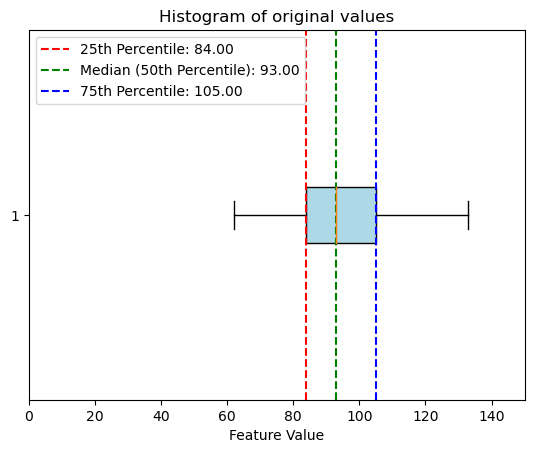

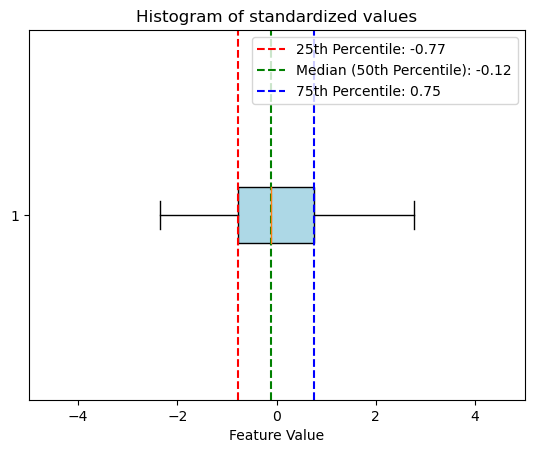

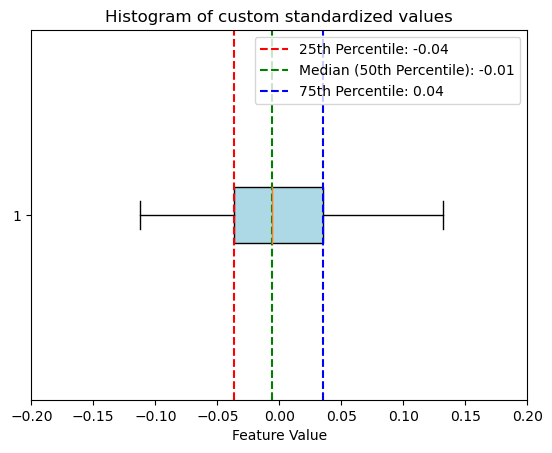

In [55]:
boxplot_with_quantiles(original_bp, "Histogram of original values", 0, 150)
boxplot_with_quantiles(standardized_bp, "Histogram of standardized values", -5, 5)
boxplot_with_quantiles(custom_standardized_bp, "Histogram of custom standardized values", -0.2, 0.2)

Standardization did not change the distribution shape but the scale location of the numbers - so it centered the data around 0 and scaled it such that the spread of values is more consistent, but the overall shape of the distribution (whether it’s skewed or bell-shaped, for example) didn't change.


In other words, the relative distances between values stayed the same, but their magnitude got reduced or increased based on the standard deviation.

In [61]:
dataset.apply(custom_standardization)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038033,0.050623,0.061626,0.021848,-0.044173,-0.034781,-0.043352,-0.002589,0.019885,-0.017626
1,-0.001880,-0.044591,-0.051416,-0.026298,-0.008439,-0.019142,0.074327,-0.039449,-0.068254,-0.092100
2,0.085202,0.050623,0.044401,-0.005664,-0.045548,-0.034156,-0.032319,-0.002589,0.002858,-0.025901
3,-0.088962,-0.044591,-0.011582,-0.036615,0.012177,0.024962,-0.035997,0.034270,0.022662,-0.009351
4,0.005377,-0.044591,-0.036344,0.021848,0.003930,0.015578,0.008133,-0.002589,-0.031951,-0.046588
...,...,...,...,...,...,...,...,...,...,...
437,0.041661,0.050623,0.019639,0.059676,-0.005690,-0.002564,-0.028642,-0.002589,0.031157,0.007198
438,-0.005508,0.050623,-0.015888,-0.067565,0.049285,0.079076,-0.028642,0.034270,-0.018093,0.044435
439,0.041661,0.050623,-0.015888,0.017274,-0.037301,-0.013824,-0.024964,-0.011067,-0.046829,0.015473
440,-0.045421,-0.044591,0.039018,0.001214,0.016300,0.015266,-0.028642,0.026530,0.044478,-0.025901
